<a href="https://colab.research.google.com/github/carl-brech/carl-brech/blob/main/A3_fossil_record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOV114 Aktivitet 3 - Biologisk mangfold og masseutdøing i fanerozoikum

![Dorudon.jpeg](attachment:3105051e-e31e-48c8-b3cd-178ea8908cc7.jpeg)

*Dorudon atrox* fra sein eocen, Wadi-al-Hitan, Egypt (Copyright: [Shanan E. Peters](http://strata.geology.wisc.edu/)).

 - https://en.wikipedia.org/wiki/Dorudon
 - https://en.wikipedia.org/wiki/Evolution_of_cetaceans
 - https://en.wikipedia.org/wiki/Wadi_El_Hitan

---
## Hva er målet med denne aktiviteten?

Målet med denne aktiviteten er å lære hvordan du bruke data fra en global fossildatabase til å rekonstruere fossil biodiversitet og masseutdøingsrater i fanerozoikum (542-0 Ma). Plott som viser fossil diversitet og utdøingsrater for ulike dyregrupper kan dere bruke i presentasjonen dere skal holde den 20. oktober.

Først vil du lære hvordan du kan strømme data direkte fra en online database, i dette tilfellet en global database over fossiler.


---
### <span style="color:blue">Innleveringsinstruks (*)</span>

Denne delen av Aktivitet 3 består av denne notebooken, som du navngir som vanlig (legger inn ditt eget navn i filnavnet). Lag en `.html`-versjon og lever denne inn på MittUiB. Dersom du har problemer med å eksportere filen kan du levere den originale `.ipynb`-filen. 

### <span style="color:blue">Innleveringsfrist(*)</span>

Innleveringsfristen for denne notebooken er onsdag 12. oktober, kl 23:59.

### <span style="color:blue">Tilbakemelding og Læringslogg(*)</span>
Vi kommer tilbake med mer informasjon om arbeidet med tilbakemeldinger og læringslogg.

<div class="alert alert-block alert-info">
<b>NB!</b> 
Læringsloggen er en viktig del av dette emnet! Du blir vurdert på arbeidet med læringsloggen din. </div>

---
## <span style="color:green"> Hente data fra *Paleobiology database* (PBDB)</span>

Geologer og paleontologer har i over to hundre år utforsket livets historie ved hjelp av fossiler oppbevart i sedimentære bergarter. I de siste tiårene har en stor andel av de fossilfunn som er beskrevet blitt gjort åpent tilgjengelig i *The Paleobiology Database*, eller PBDB blant venner. 

Du kan utforske databasen og finne mye informasjon via web-grensesnittet *PBDB Navigator*:<br/>
https://paleobiodb.org/navigator/

En instruksjonsvideo som viser hvordan du bruker *Navigator* finner du her: https://www.youtube.com/watch?v=n_FkX4Vf_8I (takk til [Phoebe Cohen](https://geosciences.williams.edu/profile/pac3/)). Du vil få bruk for *Navigator* etter hvert.

*Navigator* er en fin app, men det finnes en mer effektiv og profesjonell måte: Du kan strømme data direkte fra databasen og rett inn i ``jupyter``-notatboken ved hjelp av python-modulen ``request``. For eksempel kan vi bruke ``request``-metoden ``get(URL)``, der URL er en tekststreng hvor du spesifiserer hva du ønsker å hente:

In [ ]:
import requests

# Et eksempel på en URL request
url_string = 'https://paleobiodb.org/data1.2/occs/list.csv?base_name=Trilobita&interval=Cambrian&show=coords'

requests.get(url_string)

<Response [200]>

In [ ]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 3.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 18.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 15.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 33.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 16.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.9 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669758 sha256=e9316324eb370eaa54927af76c462aa1dc1a1b3e154749cb1598885b565357f0
  Stored in directory: /root/.cache/pip/wheels

Vær litt tålmodig, det kan ta litt tid (mye data!). Det kommer en kryptisk melding når cellen har kjørt, men hva skjedde der egentlig...? 

For å forstå hva som ble gjort i kodecellen over kan det være lurt å dele opp den kompliserte URL-strengen i sine bestanddeler, da er det mulig å ane logikken:

<div class="alert alert-block alert-info">
<b>NB!</b> 
URL-er har du sett en million ganger før i nettleseren din, og det er det samme prinsippet... </div>

In [ ]:
pbdb_server = 'https://paleobiodb.org/data1.2/' # nettsted og filsti til database-serveren

data_format = 'occs/list.csv' # be om en liste av fossilforekomster (occurrences) som komma-separerte verdier (csv)

name_str = '?base_name=Trilobita' #  be om en taksonomisk gruppe (i dette tilfellet: trilobitter!)

time_str = '&interval=Cambrian' # be om et geologisk tidsintervall

# som et alternativ kan du i stedet spesifisere eldste og yngste forekomst i millioner av år siden (Ma)
#max_age = '&max_ma=550.0' # ingen eldre enn dette (Ma)
#min_age = '&min_ma=250.0' # ingen yngre enn dette (Ma)

get_coords = '&show=coords' # be om kartkoordinatene (lengde-/breddegrad) til kartprojeksjon

Dersom du er nysgjerrig på hvor dette kommer fra, så ta gjerne en titt på fossildatabasen sitt såkalte programmeringsgrensesnitt (*Application Programming Interface*, eller API) som gir deg "spillereglene":
 
 https://www.paleobiodb.org/data1.2/
 

Nå kan du enkelt slå sammen de ulike delene til en komplett URL-streng ved å bruke ``+``:

In [ ]:
pbdb_url = pbdb_server + data_format + name_str + time_str + get_coords

# alternativ for alders-basert intervall
#pbdb_url = pbdb_server + data_format + name_str + max_age + min_age + get_coords

print(pbdb_url)

https://paleobiodb.org/data1.2/occs/list.csv?base_name=Trilobita&interval=Cambrian&show=coords


In [ ]:
pbdb_url == url_string # et logisk '==' spør: "er disse to like?"

True

Neste steg er å gi ``pbdb_url``-strengen som et input-argument til ``requests.get()``-funksjonen:

In [ ]:
requests.get(pbdb_url)

<Response [200]>

OK, vi skal straks finne ut av hva vi faktisk har fått tilbake fra denne funksjonen... men først:

I denne aktiviteten skal du utforske ulike fossilgrupper (taksonomiske grupper) i ulike tidsintervaller ved å hente data om disse fra databasen. Da kan det være veldig nyttig å definere URL-strengen på en dynamisk måte ved å skille ut takson-navnet og tidsintervallet som argumenter du kan gi til ``request.get()``-funksjonen.

Det er flere måter å gjøre dette på i Python. En klassisk måte er såkalt *streng-interpolasjon* ved hjelp av ``%``-tegnet: Sett inn en ``%s`` på det stedet der du ønsker å sette inn en streng:

In [ ]:
name_str = '?base_name=%s'
time_str = '&interval=%s'
pbdb_url = pbdb_server + data_format + name_str + time_str + get_coords
print(pbdb_url)

https://paleobiodb.org/data1.2/occs/list.csv?base_name=%s&interval=%s&show=coords


Nå kan du spesifisere et takson (fylum, klasse, orden, familie, slekt, eller et annet nivå) og et tidsintervall (alder, periode eller eon), og *interpolere* disse i ``pbdb_url``-strengen direkte når du kaller ``requests.get()``-funksjonen:

In [ ]:
taxon = 'Trilobita'
interval = 'Cambrian'
print(pbdb_url % (taxon, interval)) # legg merke til bruken av %

https://paleobiodb.org/data1.2/occs/list.csv?base_name=Trilobita&interval=Cambrian&show=coords


Fra og med Python 3 er det anbefalt å bruke en mer Pythonsk løsning som kalles *streng-formatering*, og vi vil prøve å holde oss til denne nyere varianten. Vi tok likevel med den gamle ``%``-metoden fordi du mest sannsynligvis vil støte på den på Stack Overflow og andre steder når du leter etter løsninger på feilmeldinger o.l.

Streng-formatering bruker ``{}`` og ``format()``-metoden til streng-objektet på følgende måte:

In [ ]:
name_str = '?base_name={}'
time_str = '&interval={}'
pbdb_url = pbdb_server + data_format + name_str + time_str + get_coords
print(pbdb_url)

# nå kan vi legge inn de ønskede streng-elementene som argumenter til format()
taxon = 'Trilobita'
interval = 'Cambrian'

print(pbdb_url.format(taxon, interval)) # 

https://paleobiodb.org/data1.2/occs/list.csv?base_name={}&interval={}&show=coords
https://paleobiodb.org/data1.2/occs/list.csv?base_name=Trilobita&interval=Cambrian&show=coords


---
Da er det *endelig* på tide å gjøre nytte av dataene du strømmer fra ``request.get()``-funksjonen. Du kan lagre resultatet i en variabel du kaller ``stream`` (for data-strøm):

In [ ]:
stream = requests.get(pbdb_url.format(taxon, interval)) 

---
### <span style="color:blue"> Oppgave 3.0:  Utforske ``stream``-objektet (*) </span>

Hva skjuler seg inne i ``stream``-objektet? Utforsk objektets attributter på vanlig måte og svar på følgende spørsmål:

 - Hva er URL-en til datastrømmen?
 - Hvordan er dataene innkodet, og hva betyr denne innkodingen (representasjonsformen)?
 - Prøv å dumpe datastrømmen direkte i notebooken som tekst med ``text``-attributten. Hva skjer? (For å bli kvitt dette, kommenter ut linjen med kode og kjør cellen på nytt.)

- URL-en til datastrømmen er:
https://paleobiodb.org/data1.2/occs/list.csv?base_name=Trilobita&interval=Cambrian&show=coords. URL står for "uniform resource locator". Dette er en måte å lokalisere og hente informasjon fra en spesifikk web-ressurs.
- Dataene er innkodet som en csv-fil. Dette betyr "comma separated values".
- Når man henter datastrømmen i tekstforman skrives all informasjonen fra csv'en som en tekst i en linje.

In [ ]:
#stream.text

---
Det virker lite praktisk å arbeide direkte med datastrømmen i råformat. Heldigvis kan du enkelt formatere dataene til en fin tabell ved hjelp av dataanalyse-pakken ``pandas``, som du har vært borti før.

Først må du gjøre datastrømmen lesbar med funksjonen ``StringIO()`` fra pakken ``io`` (input/output). Deretter kan du bruke ``pandas``-funksjonen ``read_csv()`` til å lage en tabell. Det kan være pedagogisk å kalle denne tabellen for ``df`` (forkortelse for ``dataframe``, som er ``pandas``-utgaven av en tabell):

In [ ]:
from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO(stream.text))

df.head(5)


,occurrence_no,record_type,reid_no,flags,collection_no,identified_name,identified_rank,identified_no,difference,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,min_ma,reference_no,lng,lat
0,1227,occ,NaN,NaN,181,Atops sp.,genus,20317,NaN,Atops,genus,20317,Caerfai,NaN,530.0,513.0,32649,-73.775002,42.322498
1,1228,occ,NaN,NaN,181,Elliptocephala sp.,genus,366989,NaN,Elliptocephala,genus,366989,Caerfai,NaN,530.0,513.0,32649,-73.775002,42.322498
2,1230,occ,NaN,NaN,181,Rimouskia sp.,genus,20928,NaN,Rimouskia,genus,20928,Caerfai,NaN,530.0,513.0,32649,-73.775002,42.322498
3,1246,occ,NaN,NaN,182,Elliptocephala sp.,genus,366989,NaN,Elliptocephala,genus,366989,Dyeran,NaN,516.0,513.0,32148,-73.685555,42.525555
4,1248,occ,NaN,NaN,182,Olenoides sp.,genus,19629,NaN,Olenoides,genus,19629,Dyeran,NaN,516.0,513.0,32148,-73.685555,42.525555


Det var bedre, men det ser ut som om det er for mange kolonner i tabellen til å vises i notebook-vinduet. Null stress, vi kan bruke attributtene og metodene til tabellobjektet og finne det vi trenger.

<div class="alert alert-block alert-info">
<b>Husk!</b> 
    En tabell består av <b>rader</b> og <b>kolonner</b>. Hver <b>rad</b> representerer vanligvis en <b>observasjon</b> (i dette tilfellet en fossilforekomst), og hver <b>kolonne</b> representerer vanligvis en <b>variabel</b> (eller 'felt' på database-språk). </div>

Når du arbeider med ``pandas``-objekter og funksjoner er det veldig greit å ha fuskelappen klar: [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)



In [ ]:
df.iloc[:5, [0, 4, 9]]

,occurrence_no,collection_no,accepted_name
0,1227,181,Atops
1,1228,181,Elliptocephala
2,1230,181,Rimouskia
3,1246,182,Elliptocephala
4,1248,182,Olenoides


---
### <span style="color:blue"> Oppgave 3.1: Plotte fossilforekomster på et kart (*) </span>

 - Tabellen ``df`` inneholder kambriske trilobittforekomster. Bruk attributtene til tabell-objektet ``df`` og finn kolonnene i tabellen som inneholder lengde- og breddegrader. Lagre disse kolonnene i variablene ``lon``og ``lat``.
 
 - Importér ``cartopy.crs`` og ``matplotlib.pyplot`` som vanlig, lag et kart med enkle kystlinjer og plott de kambriske trilobittforekomstene på kartet med kartobjektets ``scatter()``-funksjon. 
   - *Hint 1*: Bruk ``transform = ccrs.PlateCarree()`` inne i ``scatter()``. 
   - *Hint 2*: Bruk kartobjektets funksjon ``set_global()``for å vise et globalt kart.
 

 - Finn kolonnene ``min_ma`` og ``max_ma`` og bruk midtpunktet mellom disse to som aldersverdi for hver trilobittforekomst. Lagre denne som variabelen ``age``. Bruk ``age`` (eller kanskje ``-age``?) til å fargelegge hver trilobittforekomst etter alder, bruk et passende fargekart, og legg på en fargesøyle.
 
 - Lag et tilsvarende kart for en annen fossilgruppe og et annet tidsintervall. Det kan være litt utfordrende å finne riktig taksonomisk navn (f. eks. *Aves* for fugler), men prøv å finne det formelle latinske navnet ved å søke litt rundt på nettet og bruk søkefunksjonen i *Paleobiology Navigator* for å sjekke om det navnet opptrer i databasen.

In [ ]:
# Enten kan jeg lagre kollonene som numpy-arrays på følgende måte:

lon = df['lng'] # Lagrer lengdegrader som variabelen "lon"
lat = df['lat'] # Lagrer breddegrader som variabelen "lat"

# Eller så kan jeg lagre verdiene i en spesifikk pandas formatering med et rutenett: 

#df[['lng']]
#df[['lat']]

# Forsøk gjerne å visualisere begge deler (merk at variabel-lagringen "xx ="
# i det øverste eksempelet må fjernes for å visualisere dataene).



Oppgaven spør spesifikt om kambriske trilobittforekomster. Derfor må vi endre variabelen litt.
Først lokaliserer vi alle forekomstene i en liste basert på kolonnene "accepted_name" og "early_interval". Begge disse kravene må være oppfylt.

In [ ]:
from operator import index


# Først finner vi ut om dette er tilfellet kun en gang eller flere
list_1 = []
for i, j in zip(df['accepted_name'], df['early_interval']):
  if i == 'Trilobita' and j == 'Cambrian':
    list_1.append(i)
    
print(len(list_1))

1


Supert! Dette gjør det lettere for oss! Då må vi videre finne plasseringen til verdien som oppfyller kravene.

In [ ]:
list_2 = [] # Lager ny liste

for i in df['accepted_name']:
  list_2.append(i)

index = list_2.index('Trilobita') # Finner indexen

print(index)

9


Her finner vi ut at indexen som inneholder begge kriteriene er 9. Da kan vi gå videre.

Etter litt frem og tilbake fant jeg ut at alle disse dataene allerede var lagret i excel-arket og jeg behøvde ikke gjøre stegene over, men det var likevel lærerikt.

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naci

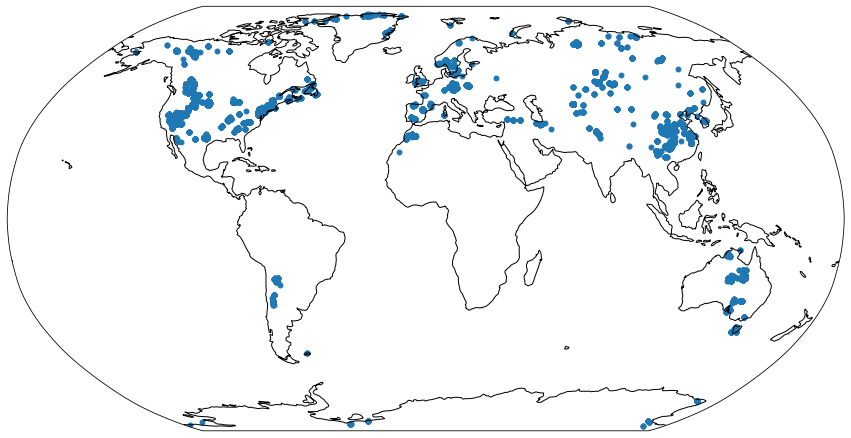

In [ ]:
plt.figure(figsize = (15, 12))

map = plt.axes(projection = ccrs.Robinson())

# Legg på enkle kystlinjer
map.coastlines()

# Plott punktene med scatter()
ax = map.scatter(lon,                         # lengdegrader på x-aksen
            lat,                              # breddegrader på y-aksen
            marker = 'o',                     # type punktmarkør
            s = 24,                           # størrelsen på markørene
            transform = ccrs.PlateCarree());  # bruk riktig projeksjon

map.set_global()




In [ ]:
min_ma = df['min_ma']
max_ma = df['max_ma']

age = (df.min_ma + df.max_ma)/2

  
age = np.array(age)

print(age)
print(len(age))


[521.5  521.5  521.5  ... 498.75 498.75 498.75]
15644


Text(0.5, 1.0, 'Trilobita in Cambrian')

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

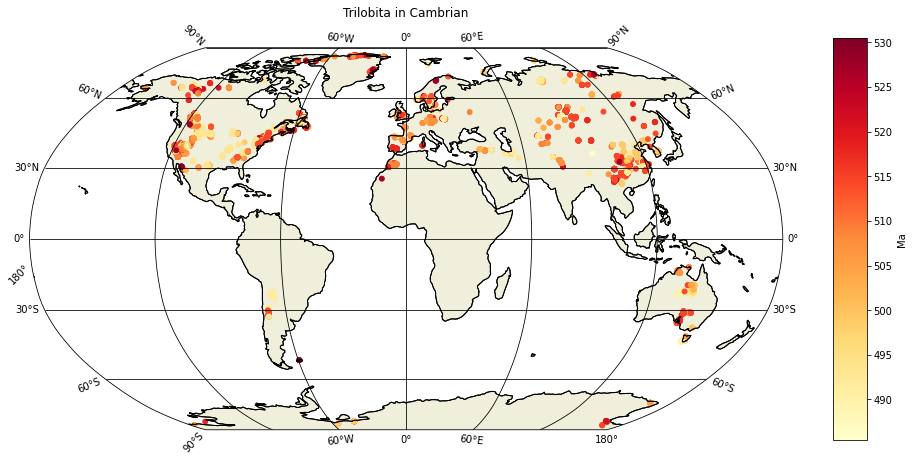

In [ ]:
plt.figure(figsize = (15, 12))

map = plt.axes(projection = ccrs.Robinson())

# Legg på enkle kystlinjer
map.coastlines()

# Plott punktene med scatter()
ax = map.scatter(lon,                         # lengdegrader på x-aksen
            lat,                              # breddegrader på y-aksen
            marker = 'o',                     # type punktmarkør
            s = 24,                           # størrelsen på markørene
            c = age,                          # farge på punkter basert på alder
            cmap = 'YlOrRd',                  # Legger til fin fargeskala
            transform = ccrs.PlateCarree());  # bruk riktig projeksjon



cbar = plt.colorbar(ax,   
            fraction = 0.04, 
            aspect = 12, 
            pad = 0.06,
            label = 'Ma')

map.set_global()

import cartopy.feature as cfeature
map.add_feature(cfeature.LAND)     # "beige" er default-fargen, prøv andre!

map.coastlines()

# Legg på rutenett av storsirkler
map.gridlines(color = 'k', draw_labels = True)

plt.title(f'{taxon} in {interval}')



Nå må vi lage et nytt kart med andre kriterier. Da starter vi deler av prosessen på nytt.

In [ ]:
name_str = '?base_name={}'
time_str = '&interval={}'
pbdb_url = pbdb_server + data_format + name_str + time_str + get_coords
print(pbdb_url)

# nå kan vi legge inn de ønskede streng-elementene som argumenter til format()
taxon = 'Aves'
interval = 'Cretaceous'

print(pbdb_url.format(taxon, interval)) # 

https://paleobiodb.org/data1.2/occs/list.csv?base_name={}&interval={}&show=coords
https://paleobiodb.org/data1.2/occs/list.csv?base_name=Aves&interval=Cretaceous&show=coords


In [ ]:
stream = requests.get(pbdb_url.format(taxon, interval)) 

In [ ]:
df = pd.read_csv(StringIO(stream.text))

In [ ]:
lon = df['lng'] # Lagrer lengdegrader som variabelen "lon"
lat = df['lat'] # Lagrer breddegrader som variabelen "lat"

In [ ]:
min_ma = df['min_ma']
max_ma = df['max_ma']

age = (df.min_ma + df.max_ma)/2

  
age = np.array(age)

#print(age)
print(len(age))


749


Text(0.5, 1.0, 'Aves in Cretaceous')

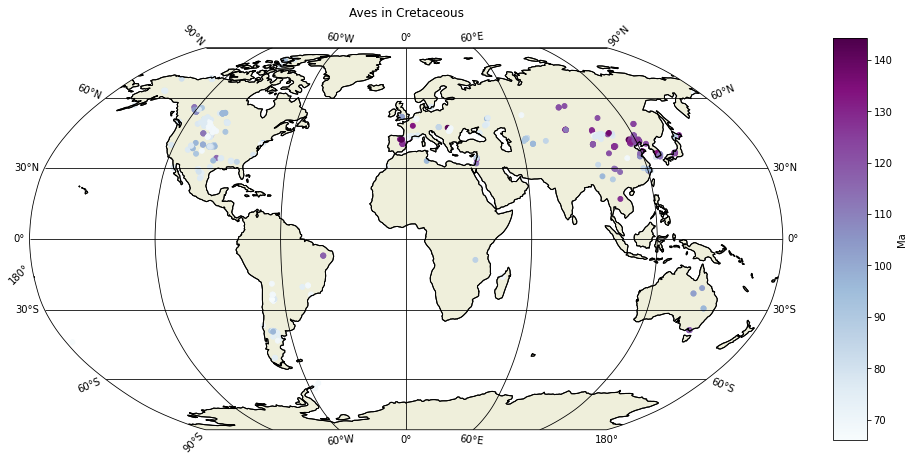

In [ ]:
plt.figure(figsize = (15, 12))

map = plt.axes(projection = ccrs.Robinson())

# Legg på enkle kystlinjer
map.coastlines()

# Plott punktene med scatter()
ax = map.scatter(lon,                         # lengdegrader på x-aksen
            lat,                              # breddegrader på y-aksen
            marker = 'o',                     # type punktmarkør
            s = 24,                           # størrelsen på markørene
            c = age,                          # farge på punkter basert på alder
            cmap = 'BuPu',                    # legger på en annen fargeskala
            transform = ccrs.PlateCarree())  # bruk riktig projeksjon




cbar = plt.colorbar(ax,   
            fraction = 0.04, 
            aspect = 12, 
            pad = 0.06,
            label = 'Ma')

map.set_global()

import cartopy.feature as cfeature
map.add_feature(cfeature.LAND)     # "beige" er default-fargen, prøv andre!

map.coastlines()

# Legg på rutenett av storsirkler
map.gridlines(color = 'k', draw_labels = True)


plt.title(f'{taxon} in {interval}')


---
## <span style="color:green"> Beregne fossil biodiversitet og utdøingsrater</span>

![egret-on-an-alligator-44677-1920x1080.jpg](attachment:9c12b9d1-b7b6-4856-80e9-c675bb7404ae.jpg)

Fugler (i dette tilfellet en egretthegre, *Ardea alba*) er de nærmeste nålevende slektningene til krokodiller (i dette tilfellet en alligator, *Alligator mississippiensis*). Hvor er "the missing link"?

(Kilde: ukjent, hentet fra https://suwalls.com/animals/egret-on-an-alligator)

---

Før du begynner vil vi ha en **kort gjennomgang på tavlen** hvor vi demonstrerer en enkel og smart metode for å beregne diversitet og utdøingsrater fra fossildata. Metoden kalles "grensekrysser-metoden" (*boundary-crosser method*) og ble utviklet av [Michael Foote](https://geosci.uchicago.edu/people/michael-foote/) (dersom du ønsker å geeke helt ut kan du ta en titt på den [originale artikkelen](https://geosci.uchicago.edu/~foote/REPRINTS/DeepTime.pdf)).

OK, da har vi vist på tavlen at det er kun fire mulige måter et takson kan krysse et geologisk tidsintervall på, og at diversitetsdynamikk kan studeres ved hjelp av disse fire grunnleggende størrelsene:
 - $X_{Ft}$: First appearance inside the interval (F), crosses the top boundary (t)
 - $X_{bL}$: Crosses the bottom boundary (b), last appearance inside interval (L)
 - $X_{FL}$: First (F) and last (L) appearance inside interval (= singleton)
 - $X_{bt}$: Crosses both the bottom (b) and the top (t) boundary

Heldigvis for oss kan *Paleobiology Database* telle opp disse størrelsene for oss, så lenge vi gir de rette "spørringene" (queries) i ``requests.get()``-funksjonen.

---

**<span style="color:red"> NB!</span>** 
 - Paleontologer beregner vanligvis fossil biodiversitet og utdøingsrater ikke på artsnivå (eng. *species*), men på *slektsnivå* (eng. *genus*, flertall *genera*). Dette fordi taksonomien er mer stabil på slektsnivå, mens artsnavn ofte blir endret når nye data viser at det trengs en revisjon. For mer informasjon om biologisk klassifikasjon og taksonomi, se: https://en.wikipedia.org/wiki/Taxonomy_(biology)
 
 - De første geologene brukte fossiler og taksonomisk utskiftning (*turnover*, dvs. at gamle taksa forsvinner, og nye dukker opp) til å definere øvre og nedre grense for geologiske (kronostratigrafiske) intervaller (https://en.wikipedia.org/wiki/William_Smith_(geologist)). Derfor kan det være nyttig å bruke absolutte geologiske aldre  (``max_age`` and ``min_age``) i stedet for geologiske periodenavn når du skal hente ut data til beregning av utdøingsrater.  
 
 - En oppdatert geologisk tidsskala (som kan avvike bittelitt fra den som er brukt i PBDB) kan du finne her: https://stratigraphy.org/ICSchart/ChronostratChart2021-07.pdf
 
---

In [ ]:
# For å hente diversitetsdata må du bruke litt andre elementer i URL-definisjonen

pbdb_server = 'https://paleobiodb.org/data1.2'

diversity_data = '/occs/diversity.txt' # Her ber du om diversitet

taxon_string = '?base_name={}'

age_string = '&max_ma={}&min_ma={}' # Bruk absolutte aldre

taxon_level = '&count=genera' # Be om å telle antall slekter

diversity_url = pbdb_server + diversity_data + taxon_string + age_string + taxon_level

---
![2880px-Dromaeosaurs.png](attachment:9a45226d-4db1-4b55-9051-4563c42268b5.png)

Figuren over viser en rekonstruksjon av noen kjente rovdinosaurer, som vi i dag vet hadde fjær (Kilde: Frederic Wierum, Wikimedia Commons, https://fredthedinosaurman.artstation.com/).

La oss beregne og plotte det fossile biologiske mangfoldet av dinosaurer unntatt fugler (*non-Avian Dinosaurs* https://en.wikipedia.org/wiki/Dinosaur):

In [ ]:
taxon = 'Dinosauria^Aves' # ekskluder undergruppen Aves
max_age = 260             # begynne noen mill. år før Trias
min_age = 45              # slutte noen mill. år etter Kritt

stream = requests.get(diversity_url.format(taxon, max_age, min_age))

In [ ]:
df = pd.read_csv(StringIO(stream.text)) # formater datatabellen med pandas
df.head(10)                             # vis de første ti radene av tabellen

,interval_no,interval_name,max_ma,min_ma,X_Ft,X_bL,X_FL,X_bt,sampled_in_bin,implied_in_bin,n_occs
0,109,Ypresian,56.0,47.8,0,1,1,0,2,0,2
1,110,Thanetian,59.2,56.0,0,0,0,1,0,0,0
2,743,Selandian,61.6,59.2,0,0,0,1,0,0,0
3,111,Danian,66.0,61.6,0,0,0,1,0,0,2
4,112,Maastrichtian,72.1,66.0,0,90,133,1,224,19,3585
5,113,Campanian,83.6,72.1,63,24,238,28,344,31,4239
6,114,Santonian,86.3,83.6,5,2,21,47,30,16,175
7,115,Coniacian,89.8,86.3,10,0,16,39,32,10,126
8,116,Turonian,93.9,89.8,4,2,17,35,27,10,263
9,117,Cenomanian,100.5,93.9,6,23,69,31,114,20,837


**<span style="color:red"> NB!</span>** 
Legg merke til at dersom ikke noe annet er spesifisert så oppgir PBDB diversitetsdataene med en tidsoppløsning tilsvarende geologiske *aldre* (eng. *stages*), se kolonnen ``interval_name``.

---
Når du har fått på plass tabellen kan du enkelt beregne total diversitet (antall slekter) i hvert tidsintervall:

 * Total diversitet
 
 $N_{tot} = X_{Ft} + X_{bL} +  X_{bt} + X_{FL}$

**<span style="color:red"> NB!</span>**
Her bruker vi altså antall slekter som en *tilnærming* til biologisk mangfold, eller biodiversitet. Det er imidlertid viktig å huske på at biodiversitet er mye mer enn bare antallet taksa i et økosystem (også kjent som artsrikhet, eng. *species richness*). Viktige komponenter i biodiversitet er bl.a. relativ tallrikhet (eng. *relative abundance*) og økologisk/funksjonelt mangfold.

In [ ]:
Ft = df.X_Ft #
bL = df.X_bL 
FL = df.X_FL 
bt = df.X_bt 

# use the interval age midpoint as time vector (x-axis)
age = age = df.max_ma - (df.max_ma - df.min_ma) / 2

N_tot = Ft + bL + FL + bt


**<span style="color:red"> NB!</span>** 
Legg merke til at når du beregner total diversitet i kodecellen over, så utfører du i virkeligheten en separat summering for hvert *element* (rad) i hver av kolonnevektorene ``Ft``, ``bL`` osv. (arrays) hentet fra tabellen ``df``. Fordi Python er et såkalt høynivå-språk så trenger du ikke fortelle Python at du vil gjøre en beregning på hvert element i et array, den gjør det automatisk. Det å arbeide med *arrays* (en- eller flerdimensjonale matrise-objekter) og Python-pakken ``numpy`` er så sentralt i naturvitenskapene at det var nylig tema for en review-artikkel i topp-tidsskriftet *Nature*: https://www.nature.com/articles/s41586-020-2649-2

Som et alternativ kan du utføre summering på hvert element eksplisitt i en ``for``-løkke:

In [ ]:
import numpy as np

# definer antall tidsintervaller i datasettet
n_time_intervals = age.size

# forbered et tomt array (her fylt med nuller) som du kan fylle med verdier inne i for-løkken
N_tot = np.zeros(n_time_intervals)

# løkken går gjennom hvert tidsintervall (rad i tabellen)
for i in range(n_time_intervals):
    
    # for hvert element (tidsintervall) i, utfør summeringen
    N_tot[i] = Ft[i] + bL[i] + FL[i] + bt[i]

# Husk innrykk!

... men en slik ``for``-løkke er altså unødvendig, og tar lenger tid.

---

Nå er du klar til å plotte den totale fossil-diversiteten av dinosaurer gjennom mesozoikum. La oss prøve et spredningsplott (eng. *scatter plot*):

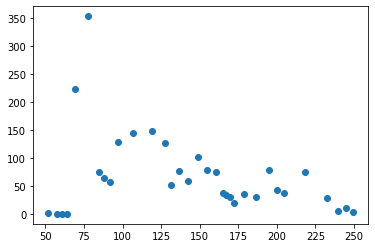

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(age, N_tot);

OK, greit nok, men vi kan forbedre plottet en del. Et spredningsplott er ofte å foretrekke fremfor linjeplott fordi det viser de faktiske observerte verdiene uten å trekke kunstige linjer mellom observasjonene. Når det er sagt, så er det vanlig å bruke linjeplott av det vi kaller *tidsserier*, fordi det ofte gjør det lettere å "lese" plottet. Vi kan få både i pose og sekk ved å legge punktmarkører på et linjeplott:

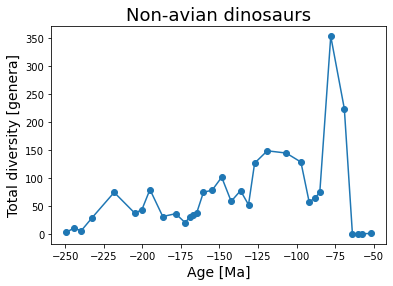

In [ ]:
plt.plot(-age, N_tot, marker = 'o')
plt.xlabel('Age [Ma]', fontsize = 14)
plt.ylabel('Total diversity [genera]', size = 14)
plt.title('Non-avian dinosaurs', size = 18);

Denne måten å plotte på gjør det litt lettere å "lese" mønsteret i tidsserien, selv om det er viktig å ikke legge for mye tolkning inn i strekene som knytter sammen punktene. Nå er det slik at geologer (særlig innen paleoklima og paleoseanografi) liker å plotte slike tidsserier med aldersverdier økende mot høyre på $x$-aksen, noe som betyr at tiden går fra høyre mot venstre. Dette er svært forvirrende for ikke-geologer, fordi den normale konvensjonen er at tiden går fra venstre mot høyre. Her i dette emnet vil vi derfor oppfordre dere til å plotte på den konvensjonelle måten, slik at tiden går fra venstre mot høyre. Den enkleste måten å gjøre det på her, siden tid er oppgitt i alder, er å bruke negative aldersverdier (``-age``). 

---

**<span style="color:red"> NB!</span>** 
Av de fire størrelsene du bruker til å beregne total diversitet, så er det ikke alle som er like informative. Den mest informative kategorien er $X_{bt}$, fordi fossile taksa som har lengre stratigrafisk utbredelse vanligvis forekommer hyppigere og er mer geografisk utbredt. Den minst informative kategorien er $X_{FL}$, som representerer taksa som bare forekommer i et enkelt tidsintervall, og disse er vanligvis sjeldne og lite geografisk utbredt. Denne sistnevnte kategorien med enkeltforekomster (eng. *singletons*) blir derfor som regel utelatt fra diversitetsberegninger.

La oss sammenligne diversitetskurven for dinosaurer med og uten singletons:

In [ ]:
N_ns = Ft + bL + bt # total diversitet uten singletons 

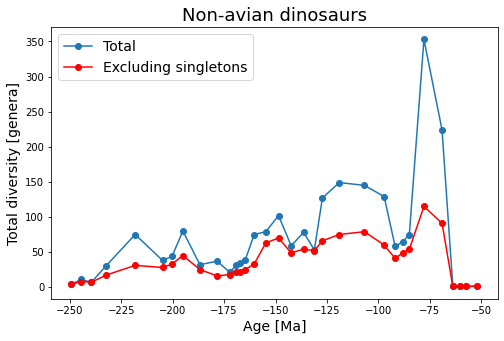

In [ ]:
fig = plt.figure(figsize = (8, 5)) # lag et figur-objekt for å lagre plottet i en fil

plt.plot(-age, N_tot, marker = 'o', label ='Total')
plt.plot(-age, N_ns, marker = 'o', color = 'red', label = 'Excluding singletons')
plt.xlabel('Age [Ma]', fontsize = 14)
plt.ylabel('Total diversity [genera]', size = 14)
plt.title('Non-avian dinosaurs', size = 18)
plt.legend(fontsize = 14);

# bruk kodelinjen under til å lagre plottet i en pdf-fil (endre gjerne navnet)
#fig.savefig('my_dinosaur_plot.pdf')

Ut fra figuren over kan du se at enkeltforekomster utgjør en stor andel av dinosaurdiversiteten (antallet fossile slekter). Det er kanskje ikke så overraskende når du tenker over at dinosaurene var landlevende dyr med lite oppbevaringspotensiale og noen taksa er bare kjent fra enkeltfossiler (ofte bare enkeltknokler) fra en enkelt lokalitet.

### <span style="color:blue"> Oppgave 3.2: Er fossil diversitet et pålitelig mål på biologisk diversitet? (*) </span>

 - Beskriv de to kurvene på figuren over, likheter og forskjeller.
 - Hvilke faktorer (biologiske, geologiske, statistiske) tror du påvirker den fossile diversitetskurven for dinosaurer?
 - Hvilke faktorer tror du har størst påvirkning, og hvorfor?
 - Hvilke grupper organismer tror du har den mest pålitelige fossildiversiteten, og hvorfor?

### Oppgave 3.2 svar

- Man kan se veldig utpregede diversitetsdata dersom man inkluderer all dataen. Data med singletons er forhøyet ekstra ved de samme tidspunktene som verdiene uten singletons, men bidrar til svært høye verdier. På tross av dette følger de to kurvene en lik trend. Når den røde kurven øker, vil også den blå øke, og motsatt.
- 

---

Nå vender vi oppmerksomheten mot en svært viktig makroevolusjonær prosess: den taksonomiske utdøingsraten (*extinction rate*)!

**<span style="color:red"> NB!</span>** 
Å estimere det absolutte antallet arter, slekter eller andre taksa som finnes til enhver tid er en nærmest umulig oppgave. Selv antallet  arter i nålevende økosystemer kan vi bare estimere med stor usikkerhet (prøv å finne alle billeartene i Amazonas!). Det vi derimot ganske enkelt kan estimere er den *relative andelen* av ulike taksa i et økosystem, selv om vi bare har tilgang til et ganske lite utvalg. Det samme gjelder utdøings-*rater*: det er mye enklere å estimere den relative andelen av taksa som overlever eller dør ut i et gitt tidsintervall enn å estimere det absolutte antallet taksa i intervallet.

Legg også merke til at beregning av utdøingsrate benytter seg av den mest robuste og informative av de fire kategoriene ($X_{bt}$):
 
 * utdøingsrate per takson (per-capita extinction rate) i et intervall
 
 $q = - \ln\left(\frac{X_{bt}}{X_{bL} + X_{bt}}\right) \frac{1}{\Delta t}$
 
Enheten for raten er i "per lineage million years" (Lmy$^{-1}$), hvor "lineage" er det samme som et takson.

In [ ]:
# regn ut lengden på tidsintervallet
dt = df.max_ma - df.min_ma

# utdøingsrate
q = - np.log(bt / (bL + bt)) / dt

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Oops, her fikk du trolig en advarsel med noe sånt som ``divide by zero encountered in log``. Hvis du tar en titt på innholdet i variabelen ``q`` vil du se at noen av verdiene er ``inf`` eller ``NaN``. Grunnen er trolig at du prøver å dele på null eller ta logaritmen av null eller begge deler.

In [ ]:
q

0          inf
1    -0.000000
2    -0.000000
3    -0.000000
4     0.739485
5     0.053829
6     0.015434
7    -0.000000
8     0.013554
9     0.084090
10    0.041297
11    0.022472
12    0.055215
13    0.005548
14    0.006442
15    0.014993
16    0.100034
17    0.028542
18    0.028122
19   -0.000000
20    0.023315
21    0.030312
22    0.019502
23    0.015527
24    0.058025
25    0.125628
26    0.022226
27    0.030992
28    0.022324
29   -0.000000
30   -0.000000
31    0.055323
32         NaN
dtype: float64

For å unngå dette problemet må du luke ut de elementene (radene i tabellen, dvs. tidsintervallene) hvor ``bt`` er lik null. Her trenger du bare fokusere på ``bt``, fordi selv om ``bL`` er lik null så vil du ikke få et problem med mindre ``bt`` også er lik null. 

Her kan det være nyttig å identifisere de elementene i ``bt`` som er lik null på en slik måte at vi kan bruke den samme fremgangsmåten seinere. En god måte å gjøre det på er ved hjelp av såkalt *logisk indeksering*, som du har vært borti tidligere. Med logisk indeksering ber du Python om å utføre noe kun på de elementene (indeksene) som oppfyller en gitt logisk betingelse:

In [ ]:
# husk indeksering av et numpy array
bt[9] # det tiende elementet i bt

31

In [ ]:
bt[0:10] # de første ti elementene i bt (fra indeks 0 og opp til men ikke med(!) indeks 10)

0     0
1     1
2     1
3     1
4     1
5    28
6    47
7    39
8    35
9    31
Name: X_bt, dtype: int64

In [ ]:
# logisk betingelse som indeks
bt[bt == 0] # alle elementene i bt hvor bt er lik null

0     0
32    0
Name: X_bt, dtype: int64

In [ ]:
# du kan spørre: bt er IKKE lik null, sant eller usant?
bt != 0

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32    False
Name: X_bt, dtype: bool

In [ ]:
# bruk denne logiske indekseringen til å velge ut alle elementene hvor betingelsen er sann
bt[bt != 0]

1      1
2      1
3      1
4      1
5     28
6     47
7     39
8     35
9     31
10    37
11    42
12    40
13    51
14    44
15    37
16    29
17    25
18    21
19    20
20    19
21    16
22    13
23    14
24    15
25    11
26    22
27    20
28    11
29     7
30     7
31     3
Name: X_bt, dtype: int64

---
Voila! Med logisk indeksering i verktøykassen kan du beregne utdøingsraten uten å måtte lage nye versjoner av de ulike variablene:

In [ ]:
idx = (bt != 0)
q = - np.log(bt[idx] / (bL[idx] + bt[idx])) / dt[idx]

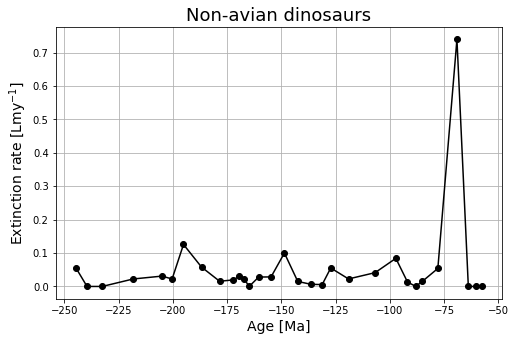

In [ ]:
fig = plt.figure(figsize = (8, 5))

plt.plot(-age[idx], q, marker = 'o', color = 'black')

plt.ylabel('Extinction rate [Lmy$^{-1}$]', size = 14) # pyplot godtar LaTeX-formatering av strenger
plt.xlabel('Age [Ma]', size = 14)
plt.title('Non-avian dinosaurs', size = 18)
plt.grid();

Ser man det. Med det blotte øye kan du identifisere en veldig tydelige "topp" i utdøingsraten, hvor $q > 0.7$. Du kan kanskje ane hvilke hendelse det er snakk om. Men det er også mulig å peke ut tre "topper" der $q > 0.1$, som muligens indikerer hendelser hvor en betydelig andel av dinosaurene døde ut. 

Du kan ganske enkelt finne hvilket geologisk tidsintervall disse hendelsene tilhører, og beregne det omtrentlige tidspunktet for utdøingshendelsene ved å hente ut den absolutte alderen for øverste grense (``min_ma``) av tidsintervallet. Igjen kan du bruke logisk indeksering:

In [ ]:
# utdøingshendelser kan bestemmes til øvre grense av tidsintervallet
df.min_ma[idx][q > 0.1] # legg merke til to lag med indeksering

4      66.0
16    145.0
25    190.8
Name: min_ma, dtype: float64

Ved å se på den kronostratigrafiske tabellen (https://stratigraphy.org/ICSchart/ChronostratChart2021-07.pdf) kan vi bekrefte at ihvertfall den største av disse utdøingshendelsene tilsvarer en kjent masseutdøing: Overgangen Kritt-Paleogen for 66 millioner år siden.

---

### <span style="color:blue"> Oppgave 3.3: Fanerozoiske diversitetskurver (*) </span>

Les inn diversitetsdata og plott diversitetskurver (med og uten singletons) for følgende taksonomiske grupper  (**<span style="color:red"> NB!</span>** Begrens alderen fra 530 Ma til 3 Ma for å dempe "kanteffekter"):   
 
   * Bløtdyr (``Mollusca``)
   * Brachiopoda
   * Leddyr (``Arthropoda``) **unntatt** insekter (``Hexapoda``)
   * Pigghuder (``Echinodermata``)
   * Nesledyr (``Cnidaria``)
   * Virveldyr (``Vertebrata``) **unntatt** pattedyr (``Mammalia``)
          

---


### Oppgave 3.3 svar

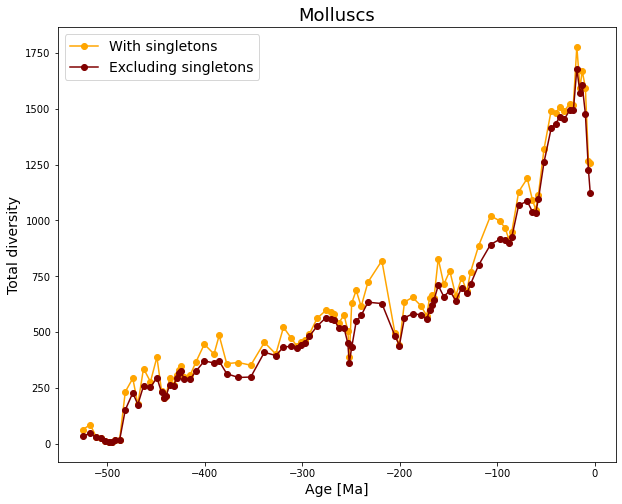

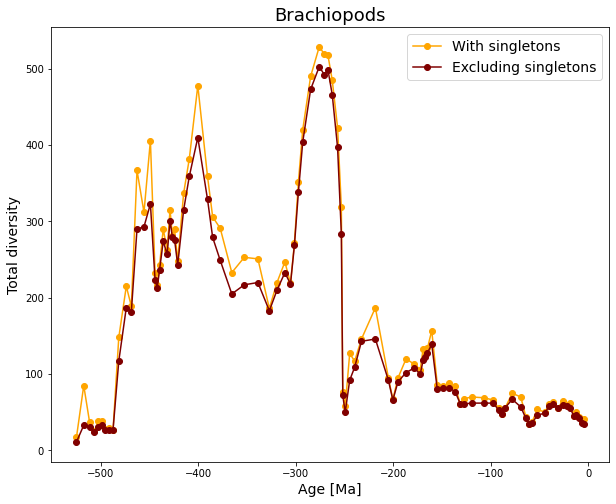

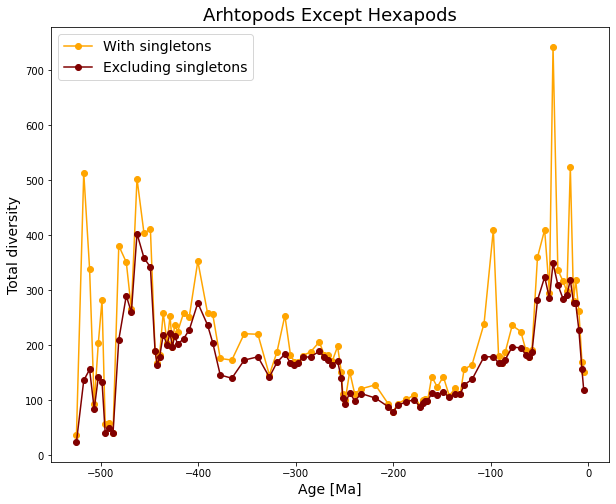

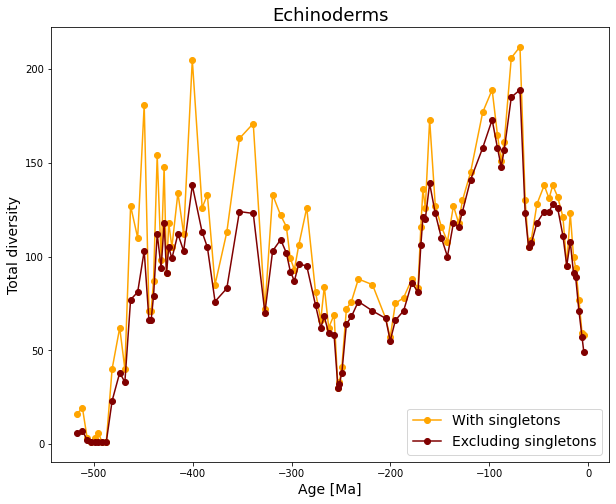

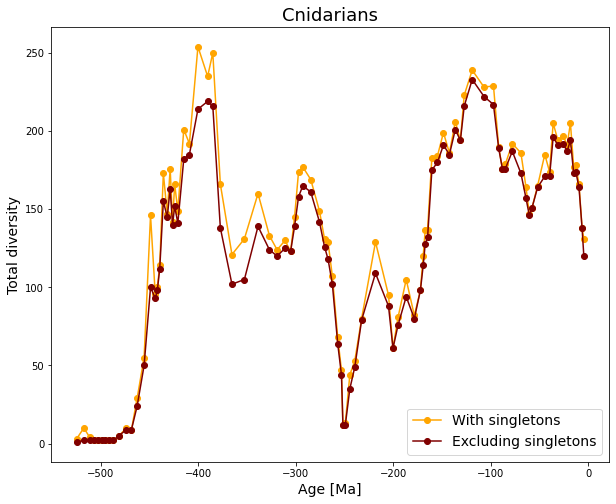

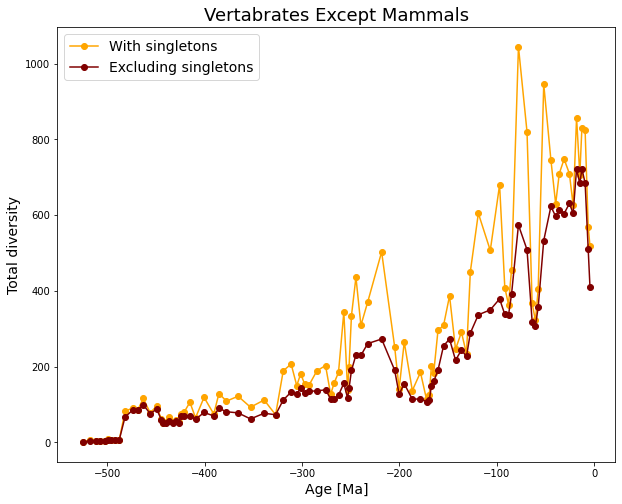

In [ ]:
# Getting biodiversity data

pbdb_server = 'https://paleobiodb.org/data1.2'

diversity_data = '/occs/diversity.txt' # Her ber du om diversitet

taxon_string = '?base_name={}'

age_string = '&max_ma={}&min_ma={}' # Bruk absolutte aldre

taxon_level = '&count=genera' # Be om å telle antall slekter

diversity_url = pbdb_server + diversity_data + taxon_string + age_string + taxon_level

# Defining age

min_age = 3
max_age = 530

# Creating relevant lists

list_of_taxons = ['Mollusca',
                  'Brachiopoda',
                  'Arthropoda^Hexapoda',
                  'Echinodermata',
                  'Cnidaria',
                  'Vertebrata^Mammalia']

list_of_taxon_names = ['Molluscs',
                       'Brachiopods',
                       'Arhtopods Except Hexapods',
                       'Echinoderms',
                       'Cnidarians',
                       'Vertabrates Except Mammals']

# Creating for-loop

for i, j in enumerate(list_of_taxons): # For-loop iterating over list of taxons

  # Requesting diversity data in a stream given the taxon, min age and max age
  stream = requests.get(diversity_url.format(j, max_age, min_age))

  # Formating dataframe using pandas
  df = pd.read_csv(StringIO(stream.text)) 

  # F = first occurence withing given timeframe
  # L = last occurence within given timeframe
  # b = bottom (oldest) occurence before given timeframe
  # t = top (yongest) occurence after given timeframe

  Ft = df.X_Ft # First to top occurence (upper)
  bL = df.X_bL # Bottom to last occurence (lower)
  FL = df.X_FL # First to last occurence (narrow)
  bt = df.X_bt # Bottom to top occurence (wide)

  # Use the interval age midpoint as time vector (x-axis)
  age = df.max_ma - (df.max_ma - df.min_ma) / 2

  N_tot = Ft + bL + FL + bt # Total number of occurences with singletons
  N_ns = Ft + bL + bt # Number of occurences without singletons

  # Creating a figureplot w/ 10 pixels horizontally and 8 pixels laterally
  plt.figure(figsize=(10, 8)) 

  # Plotting values with and w/o singletons in created plot
  # Age is given as "-age" to give a more intuitive visualization
  plt.plot(-age, N_tot, marker = 'o', color = 'orange', label = 'With singletons')
  plt.plot(-age, N_ns, marker = 'o', color = 'maroon', label = 'Excluding singletons')

  # Adjusting the plot
  plt.xlabel('Age [Ma]', fontsize = 14) # Label in x-directon
  plt.ylabel('Total diversity', size = 14) # Label in y-direction

  # Title of figure iterating
  plt.title(list_of_taxon_names[i], size = 18) # Using index from list 2
  plt.legend(fontsize = 14) # Adding a legend 

  # Showing the plot for each iteration
  plt.show()


### <span style="color:blue"> Oppgave 3.4: Diversitetskurve og utryddelskurve som subplott (*) </span>
For hver taksonomiske gruppe, plott diversitetskurven og utdøingskurven som to subplott på samme figur. Gi en kort beskrivelse av kurvene.


### Oppgave 3.4 svar

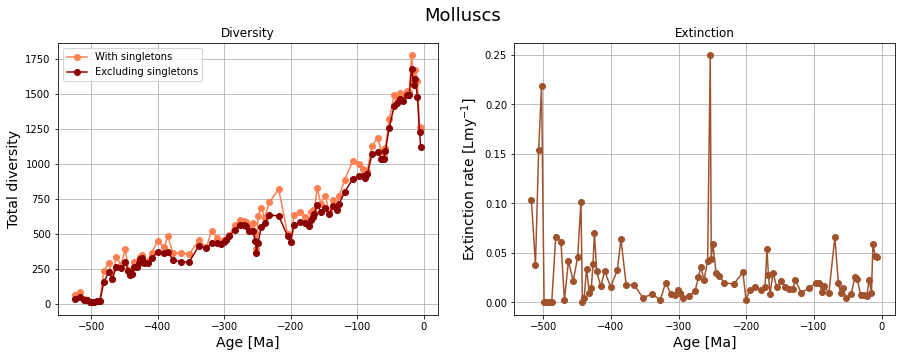

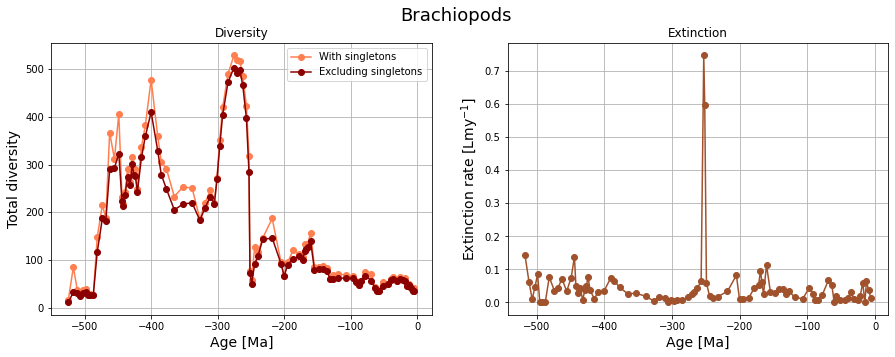

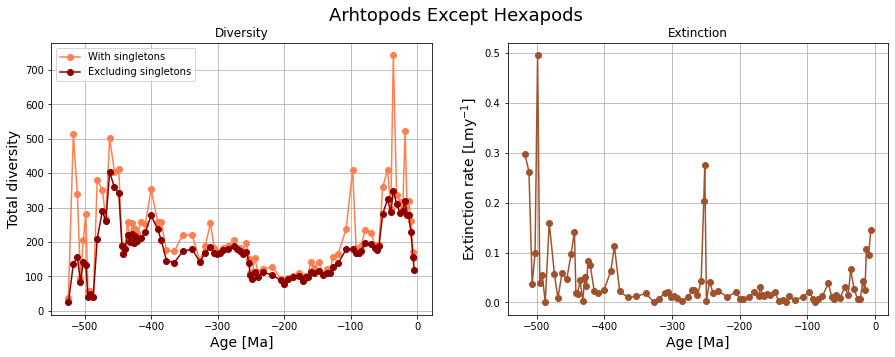

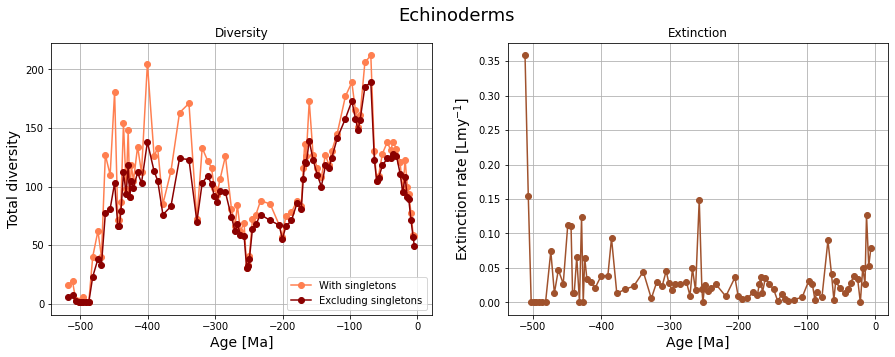

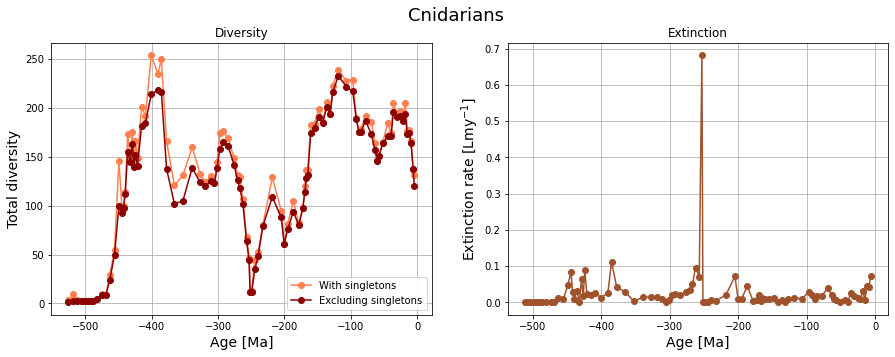

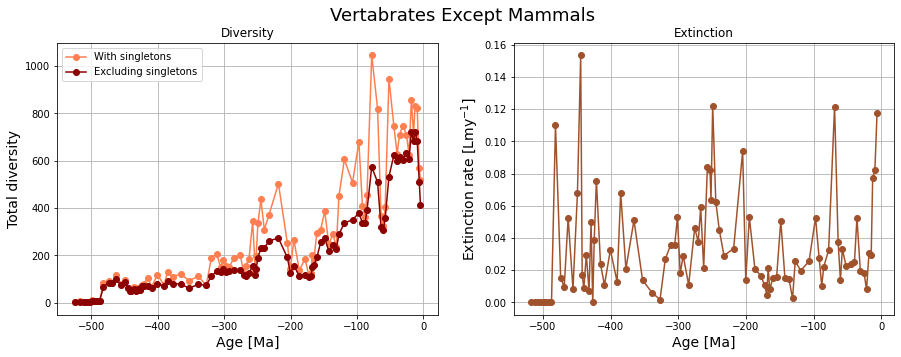

In [ ]:
# Doing much of the same as in assignment 3.3
# Lists already defined
# Age already defined


def div_function(i, j):
  # Getting new stream each time
  # The iteration takes a lot of time due to this request
  stream = requests.get(diversity_url.format(i, max_age, min_age)) 

  # Formating dataframe using pandas
  df = pd.read_csv(StringIO(stream.text)) 

  Ft = df.X_Ft # First to top occurence (upper)
  bL = df.X_bL # Bottom to last occurence (lower)
  FL = df.X_FL # First to last occurence (narrow)
  bt = df.X_bt # Bottom to top occurence (wide)

  # Use the interval age midpoint as time vector (x-axis)
  age = df.max_ma - (df.max_ma - df.min_ma) / 2

  N_tot = Ft + bL + FL + bt # Total number of occurences with singletons
  N_ns = Ft + bL + bt # Number of occurences without singletons

  idx = (bt != 0) # Index should be where bottom-top not equal to zero

  # Creating a figure with 10 in width and 5 in height (due to subplots)
  fig = plt.figure(figsize = (15,5))

  # Setting common title for subplots
  plt.suptitle(j, size = 18)
  
  # set the spacing between subplots
  fig.tight_layout()

  # Creating subplots (row, column, placement of plot)
  div_fig = plt.subplot(1, 2, 1)

  #First subplot; diversity plot, position one
  div_fig.plot(-age, N_tot, marker = 'o', color = 'coral', label = 'With singletons')
  div_fig.plot(-age, N_ns, marker = 'o', color = 'darkred', label = 'Excluding singletons')

  # Adjusting the sublplot
  plt.xlabel('Age [Ma]', fontsize = 14)
  plt.ylabel('Total diversity', size = 14)
  plt.title('Diversity')
  plt.legend(fontsize = 10)
  plt.grid()

  # Finner tidsintervallet
  dt = df.max_ma - df.min_ma

  # Adding feature to second subplot
  q = - np.log(bt[idx] / (bL[idx] + bt[idx])) / dt[idx]

  # Creating second subplot; extinction plot; position two
  ex_fig = plt.subplot(1, 2, 2)

  # Second subplot
  ex_fig.plot(-age[idx], q, marker = 'o', color = 'sienna')

  # pyplot godtar LaTeX-formatering av strenger
  plt.ylabel('Extinction rate [Lmy$^{-1}$]', size = 14) 
  plt.xlabel('Age [Ma]', size = 14)
  plt.title('Extinction')
  plt.grid()

  fig.savefig('Marine_animals.pdf')


for i, j in enumerate(list_of_taxons): # For-loop iterating through list
  div_function(j, list_of_taxon_names[i])

---
### <span style="color:blue"> Oppgave 3.5: Beskrivelse av taksonomiske grupper (*) </span> 
For hver taksonomiske gruppe, skriv en kort tekst hvor du redegjør for hvilken dyr som tilhører gruppen, litt om levemåte/økologi, samt evolusjonær historie (keep it simple!). Bruk moderat kildekritikk (OK da, Wikipedia er stort sett akseptabelt i denne sammenhengen) og oppgi referanser/lenker der det er naturlig. Dersom du ønsker *fun facts* om livets historie, ta en titt på PBS *Eons* https://www.pbs.org/show/eons/


### Oppgave 3.5 svar

### <span style="color:blue"> Oppgave 3.6: Globale masseutdøinger i fanerozoikum (*) </span> 
Greit - da skal du trå til og lage en fanerozoisk diversitets- og utdøingskurve for *alle marine dyr* og prøve å skille masseutdøinger fra "vanlige" utdøinger. Da må du gjøre følgende: 
 
  * Sett ``taxon``-argumentet til ``Animalia`` og legg til en ekstra komponent i URL-strengen: ``&envtype=marine`` (du vil bare lese inn data for marine dyr!). Det kan ta litt tid å fullføre ``request.get()`` for så mye data, så vi foreslår at du henter deg en kaffe eller andre passende stimuli. 
  
  * Sett aldersgrensene som beskrevet over (530-3 Ma) og lag de vanlige plottene med diversitet og utdøingsrate. I de påfølgende punktene vil du bare bruke utdøingsraten ($q$).
  
  * Legg merke til at $q$-verdiene er ganske høye i de eldste og de yngste tidsintervallene. Grunnen til dette er at de eldste (kambriske) intervallene er dominert av en enkelt gruppe (trilobitter), mens de yngste intervallene påvirkes av en "kanteffekt". Derfor bør du klippe av tidsintervallene eldre enn 490 Ma og yngre enn 12 Ma. Lag et nytt plott av $q$ etter du har klippet disse av, og gi en kort beskrivelse av kurven. 
  
  * Plott $q$-verdiene som et histogram (*hint*: prøv deg frem med argumentene ``bins``, ``color`` og ``edgecolor`` for å få et fint histogram), og gi en kort beskrivelse.
  
  * Å sette et skarpt skille mellom  *masse*-utdøing og annen ("bakgrunns-") utdøing er ikke helt enkelt, blant annet fordi tidlig paleozoikum er preget av høye utdøingsrater (grunnene til dette skal vi ikke gå inn på her). For å gjøre denne analysen litt enklere kan du derfor dele de fanerozoiske $q$-verdiene inn i to deler, *paleozoikum* (490-250 Ma) og *post-paleozoikum* (249-12 Ma), and analysere disse to delene hver for seg.
  
  * Del $q$-verdiene inn i et paleozoisk og et post-paleozoisk segment, og lag en figur der du plotter to *boksplott*, et for hvert segment, på samme akseobjekt (*hint*: du kan plotte begge ved å gi begge i klammeparentes ``[segment1, segment2]`` som argument til boksplott-funksjonen, og du kan gi tilsvarende *labels* på samme måte).
  
  * For mer informasjon om boksplott og hvordan de kan tolkes, se https://en.wikipedia.org/wiki/Box_plot
  
  * Hvis du bruker standardinnstillingene (default settings) i boksplott-funksjonen, så vil masseutdøingene vises som statistiske "ekstremverdier" (*outliers*, eller "fliers" i boksplott-sammenheng) som punkter over strekene (*whiskers*) som går ut fra hver boks. Disse representerer altså $q$-verdier som er statistisk utenom det vanlige, og kan derfor karakteriseres som *masse*-utdøinger.
  
  * For å hente ut disse ekstreme "flier"-verdiene må du lagre plottet med de to boksplottene som et objekt du kaller ``bp``. Da kan du få ut "flier"-verdiene for det første boksplottet med ``bp["fliers"][0].get_data()[1]`` og "flier"-verdiene for det andre boksplottet med  ``bp["fliers"][1].get_data()[1]``.
  
  * Hvor mange masseutdøingshendelser finner du? Hvilke aldre (``min_ma``) har disse? Representerer disse noen av de kjente masseutdøingshendelsene, og i så fall, hvilke?

### Oppgave 3.6 svar

In [ ]:
# Setting taxon

taxon = 'Animalia'

# Getting biodiversity data

pbdb_server = 'https://paleobiodb.org/data1.2'

diversity_data = '/occs/diversity.txt' # Her ber du om diversitet

taxon_string = '?base_name={}'

age_string = '&max_ma={}&min_ma={}' # Bruk absolutte aldre

taxon_level = '&count=genera' # Be om å telle antall slekter

only_marine = '&envtype=marine' # Ber om å hente data fra marine dyr

diversity_url = pbdb_server + diversity_data + taxon_string + age_string + taxon_level + only_marine

# Setting age
min_age = 3
max_age = 530

# Getting stream
stream = requests.get(diversity_url.format(taxon, max_age, min_age))

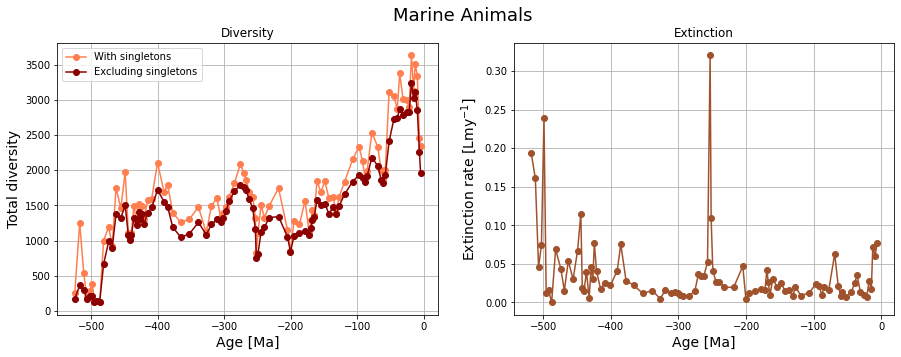

In [ ]:

div_function('Animalia', 'Marine Animals')




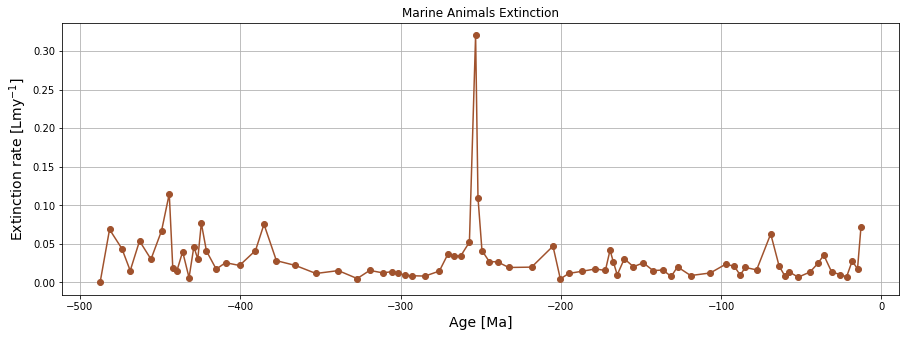

In [ ]:
min_age = 3
max_age = 530

# Getting stream
stream = requests.get(diversity_url.format(taxon, max_age, min_age))

# Formating dataframe using pandas
df = pd.read_csv(StringIO(stream.text)) 

Ft = df.X_Ft # First to top occurence (upper)
bL = df.X_bL # Bottom to last occurence (lower)
FL = df.X_FL # First to last occurence (narrow)
bt = df.X_bt # Bottom to top occurence (wide)

# Use the interval age midpoint as time vector (x-axis)
age = df.max_ma - (df.max_ma - df.min_ma) /2

N_tot = Ft + bL + FL + bt # Total number of occurences with singletons
N_ns = Ft + bL + bt # Number of occurences without singletons

idx = (bt != 0) # Index should be where bottom-top not equal to zero

# Creating a figure with 10 in width and 5 in height (due to subplots)
fig = plt.figure(figsize = (15,5))

# Finner tidsintervallet
dt = df.max_ma - df.min_ma

age_index = (age >= 12) & (age <= 490)

# Adding feature to second subplot
q = - np.log(bt[idx] / (bL[idx] + bt[idx])) / dt[idx]

# Second subplot
plt.plot(-age[age_index], q[age_index], marker = 'o', color = 'sienna')

# pyplot godtar LaTeX-formatering av strenger
plt.ylabel('Extinction rate [Lmy$^{-1}$]', size = 14) 
plt.xlabel('Age [Ma]', size = 14)
plt.title('Marine Animals Extinction')
plt.grid()

fig.savefig('Marine_animals_extinction.pdf')


Curve description:

I observe a moderate alternating extinction activity between 490 and 390 Ma (0,05 to 0,15 Lm/y). After this the activity cools down before an extreme peak at 250Ma (above 0,3 Lm/y). After this there is low extinction until around 15 Ma (ca. 0,2 Lm/y).

(array([15., 32., 14.,  9.,  5.,  3.,  4.,  3.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.        , 0.01067659, 0.02135319, 0.03202978, 0.04270638,
        0.05338297, 0.06405957, 0.07473616, 0.08541276, 0.09608935,
        0.10676595, 0.11744254, 0.12811914, 0.13879573, 0.14947233,
        0.16014892, 0.17082552, 0.18150211, 0.19217871, 0.2028553 ,
        0.2135319 , 0.22420849, 0.23488508, 0.24556168, 0.25623827,
        0.26691487, 0.27759146, 0.28826806, 0.29894465, 0.30962125,
        0.32029784]),
 <a list of 30 Patch objects>)

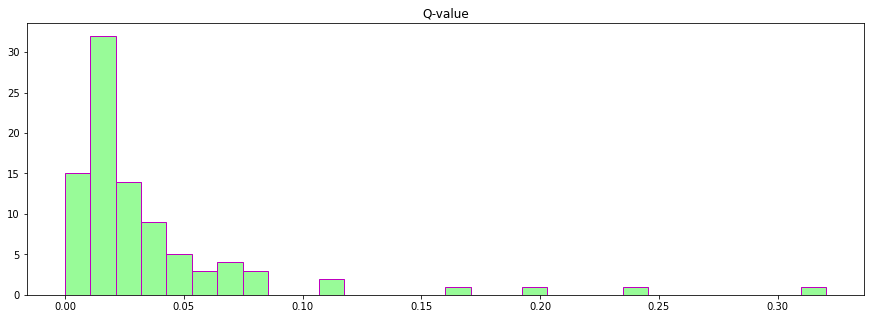

In [ ]:
fig = plt.figure(figsize = (15,5))

plt.title('Q-value')
plt.hist(q, bins = 30, color = 'palegreen', edgecolor = 'm')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Distribution of extinctions')

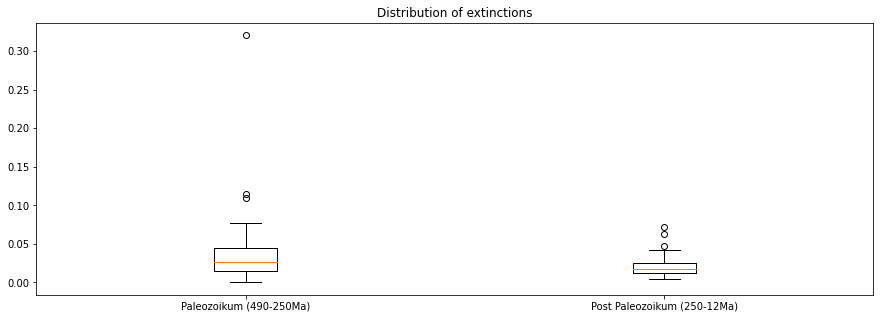

In [ ]:
q_paleozoikum = q[(age <= 490)&(age >= 250)]
q_post_paleozoikum = q[(age <= 249)&(age >= 12)]

fig = plt.figure(figsize = (15,5))
bp = plt.boxplot([q_paleozoikum, q_post_paleozoikum])

plt.xticks([1, 2], ['Paleozoikum (490-250Ma)', 'Post Paleozoikum (250-12Ma)'])
plt.title('Distribution of extinctions')




Basert på verdiene som hentes ut fra bp['fliers'] finnes 3 masseutdødninger i paleozoikum og 3 masseutdødninger etter paleozoikum

In [ ]:
a1 = bp['fliers'][0].get_data()[1]
a2 = bp['fliers'][1].get_data()[1]

age_1 = df.min_ma[(250 <= age)%(490 >= age)]
age_2 = df.min_ma[(249 >= age)&(12 <= age)]

for i in a1:
  print(age_1[q_paleozoikum == i])

for i in a2:
    print(age_2[q_post_paleozoikum == 1])

IndexingError: ignored